In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
from model import VQImageBERT
from objective import VQImageBERTObj
from config import cfg
from datasets import ImageDataset

In [3]:
dataset = ImageDataset('val', cfg)
loader = torch.utils.data.DataLoader(dataset, batch_size=4)

In [4]:
batch = next(iter(loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


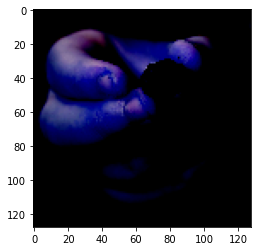

In [5]:
plt.imshow(batch[2].permute(1,2,0))

In [6]:
model_loss = VQImageBERTObj(cfg)

In [7]:
model_loss(batch)

tensor(80.3980, grad_fn=<DotBackward>) tensor(919153.5000, grad_fn=<SumBackward0>)
tensor(105.9666, grad_fn=<DotBackward>) tensor(919153.5000, grad_fn=<SumBackward0>)
tensor(-3.3340, grad_fn=<DotBackward>) tensor(17105.9746, grad_fn=<SumBackward0>)
tensor(250.1811, grad_fn=<DotBackward>) tensor(919153.5000, grad_fn=<SumBackward0>)
tensor(176.6060, grad_fn=<DotBackward>) tensor(919153.5000, grad_fn=<SumBackward0>)
tensor(213.7199, grad_fn=<DotBackward>) tensor(919153.5000, grad_fn=<SumBackward0>)
tensor(109.7596, grad_fn=<DotBackward>) tensor(919153.5000, grad_fn=<SumBackward0>)
tensor(135.8177, grad_fn=<DotBackward>) tensor(919153.5000, grad_fn=<SumBackward0>)
tensor(200.9419, grad_fn=<DotBackward>) tensor(919153.5000, grad_fn=<SumBackward0>)
tensor(137.7552, grad_fn=<DotBackward>) tensor(919153.5000, grad_fn=<SumBackward0>)
tensor(146.3364, grad_fn=<DotBackward>) tensor(919153.5000, grad_fn=<SumBackward0>)
tensor(95.4868, grad_fn=<DotBackward>) tensor(919153.5000, grad_fn=<SumBackward

(tensor(10.5022, grad_fn=<NllLoss2DBackward>),
 tensor(nan, grad_fn=<DivBackward0>))

In [10]:
a = torch.randn(3,10).exp()

In [11]:
a

tensor([[0.4131, 0.6913, 2.7739, 1.3400, 1.3514, 0.5519, 0.8449, 3.5819, 1.4955,
         0.4820],
        [5.9609, 0.7226, 0.7184, 0.5780, 5.7901, 1.1796, 3.4064, 9.7581, 1.1117,
         0.0734],
        [1.8718, 0.5466, 2.0826, 1.1944, 0.5181, 1.5057, 1.3135, 0.2793, 2.0275,
         1.1889]])

In [8]:
a = torch.randn(4, 256, 1024)

In [21]:
b = torch.nn.functional.normalize(a, dim=2)

In [22]:
b[1,1,:].norm()

tensor(1.)